In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,roc_curve, roc_auc_score, auc
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

In [2]:
# import dataset 
diabetes= pd.read_csv("C:/Users/kezen/OneDrive/Documents/Microsoft/data/diabetes.csv", delimiter=",", header="infer")

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
x = diabetes[features].values 
y =diabetes[label].values

# split data 70% to training and test dataset: 70% to training and 30% to testing dataset 
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100) # random_state ensures reproducibility

In [3]:
# Set up different machine learning models 
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("Adaboost", AdaBoostClassifier()))


In [4]:
# Evaluate model performance
results = []
names = []
scoring = "accuracy"
#perform cross validation 
for name, model in models:
    kfold = model_selection.KFold(n_splits= 10, random_state= None) # set up cross validation
    cv_results = model_selection.cross_val_score(model, x_train, y_train, scoring = scoring, cv = kfold)
    results.append(cv_results)
    names.append(name)
    output = f"{name}: {round(cv_results.mean(),2)}"
    print(output)


C:\Users\kezen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kezen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.78
LDA: 0.79
KNN: 0.84
NB: 0.79
CART: 0.9
RF: 0.94
Adaboost: 0.95


Adaboost has the highest accuracy (0.95) on the traininig dataset. Therefore build final model using Adaboost


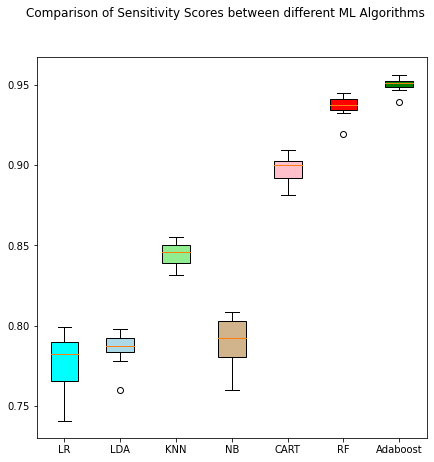

In [5]:
# plot boxplot comparing the algorithms 
fig = plt.figure(figsize = (7,7))
fig.suptitle("Comparison of Sensitivity Scores between different ML Algorithms")
ax = fig.add_subplot(111)
box = plt.boxplot(results, patch_artist= True)
ax.set_xticklabels(names)
colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink', "red", "green", "purple"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)
plt.show()



In [14]:
final_model = AdaBoostClassifier(random_state= 0).fit(x_train, y_train)
# make predictions on the test data set 
predictions = final_model.predict(x_test)
# create dataframe of predictions vs actual values 
df = pd.DataFrame({
    "Actual_values": y_test,
    "Predicted_values": predictions
})
df.sample(10)


,Actual_values,Predicted_values
2794,0,0
2853,0,0
351,0,0
591,0,0
4191,1,1
1423,0,0
2910,0,0
563,0,1
1926,0,0
3975,0,0


In [15]:
# evaluate model performance 
accuracy = np.round(accuracy_score(y_test, predictions), 2)
recall = np.round(recall_score(y_test, predictions), 2)
precision = np.round(precision_score(y_test, predictions), 2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predictions)
print("Confusion Matrix:", "\n", cm)



Accuracy: 0.95
Recall: 0.92
Precision: 0.93
Confusion Matrix: 
 [[2902  104]
 [ 122 1372]]


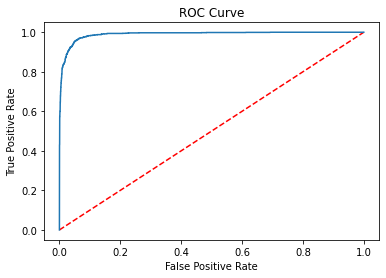

In [23]:
# plot the ROC Curve

#ROC Curve shows the curve of the true and false positive rates.

from sklearn.metrics import roc_curve, roc_auc_score
# get probailities of th predictions 
y_scores  = final_model.predict_proba(x_test)

# calculate the ROC Curve 
fpr, tpr, thresholds = roc_curve(y_true= y_test, y_score= y_scores[:,1])
# plot the 50% diagonal line 
plt.plot([0,1], [0,1], "r--")
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()